# Download a ViSAPy data file

This is the retina data set generated with [ViSAPy](https://github.com/espenhgn/ViSAPy) as presented in Espen's [paper](http://dx.doi.org/10.1016/j.jneumeth.2015.01.029) in the Journal of Neuroscience Methods.

In [5]:
import urllib
file_url = 'https://datasync.ed.ac.uk/public.php/webdav'

password_mgr = urllib.request.HTTPPasswordMgrWithDefaultRealm()
password_mgr.add_password(None, file_url, "GbnXJ5bU3m9JPau", "HS2")
handler = urllib.request.HTTPBasicAuthHandler(password_mgr)
opener = urllib.request.build_opener(handler)
opener.open(file_url)
urllib.request.install_opener(opener)
with urllib.request.urlopen(file_url) as response, open('visapy_data.npy', 'wb') as out_file:
    data = response.read()
    out_file.write(data)

# Use of the `HSDetection` class

In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../')
from herdingspikes.hs2 import HSDetection
from herdingspikes.probe import HierlmannVisapyEmulationProbe
import matplotlib.pyplot as plt


In [2]:
# raw data location
data_path = 'visapy_data.npy'

# detection parameters
to_localize = True
cutout_start = 14
cutout_end = 36
threshold = 12
num_com_centers = 4
file_directory = 'results/'
file_name = 'ProcessedSpikes_visapy'

In [12]:
Probe = HierlmannVisapyEmulationProbe(data_path, inner_radius=30)
H = HSDetection(Probe, to_localize, num_com_centers, cutout_start, cutout_end, threshold,
                maa=0, maxsl=12, minsl=3, ahpthr=0, out_file_name=file_name,  
                file_directory_name=file_directory, decay_filtering=False, save_all=True)

File size: 122400102
Number of channels: 102


In [13]:
H.num_com_centers

4

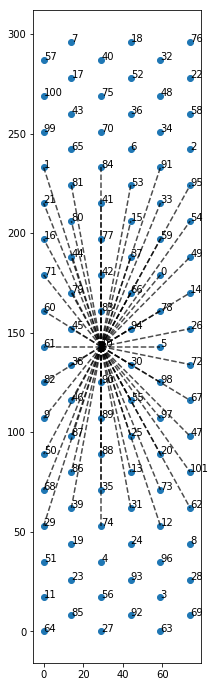

In [14]:
Probe.show()

In [15]:
H.DetectFromRaw()

# Sampling rate: 32000
# Localization On
# Not Masking any Channels
# Writing out extended detection info
# Number of recorded channels: 102
# Analysing frames: 1200001, Seconds:37.50003125
# Frames before spike in cutout: 32
# Frames after spike in cutout: 70
# tcuts: 44 59
# tInc: 50000
# Analysing 50000 frames; from -44 to 50059
# Analysing 50000 frames; from 49956 to 100059
# Analysing 50000 frames; from 99956 to 150059
# Analysing 50000 frames; from 149956 to 200059
# Analysing 50000 frames; from 199956 to 250059
# Analysing 50000 frames; from 249956 to 300059
# Analysing 50000 frames; from 299956 to 350059
# Analysing 50000 frames; from 349956 to 400059
# Analysing 50000 frames; from 399956 to 450059
# Analysing 50000 frames; from 449956 to 500059
# Analysing 50000 frames; from 499956 to 550059
# Analysing 50000 frames; from 549956 to 600059
# Analysing 50000 frames; from 599956 to 650059
# Analysing 50000 frames; from 649956 to 700059
# Analysing 50000 frames; from 699956 to 750

In [16]:
H.LoadDetected()

Detected and read 47111 spikes.


Spike detected at channel:  55
Spike detected at frame:  3691
52.965 118.209


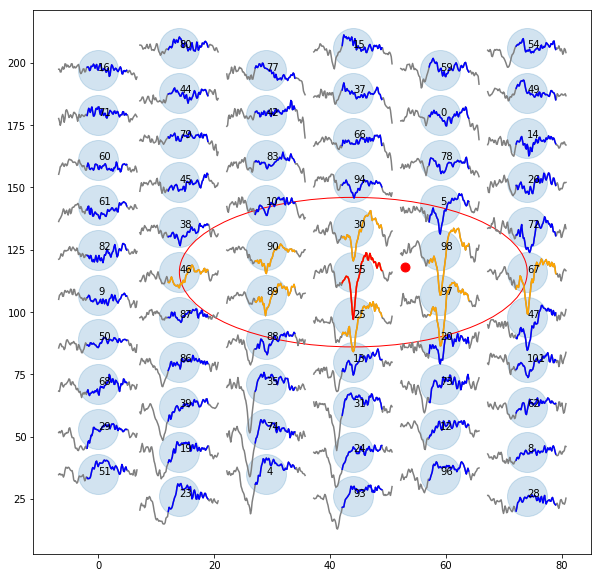

In [17]:
plt.figure(figsize=(10, 10))
H.PlotTracesChannels(145, window_size=100)

Spike detected at channel:  18
Spike detected at frame:  6432
49.866 290.011


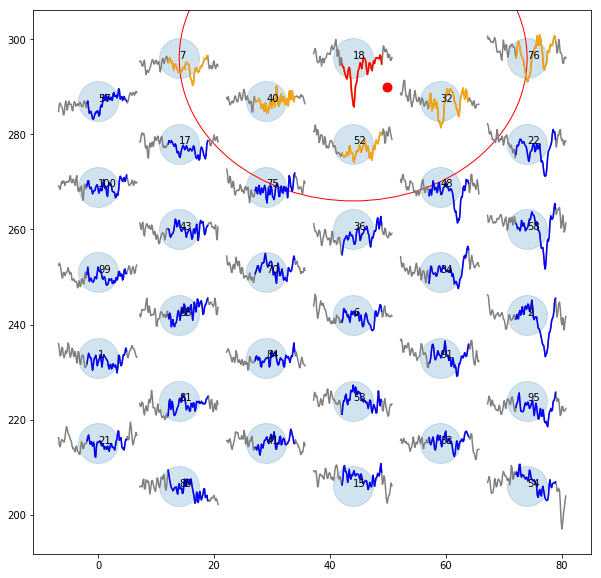

In [20]:
plt.figure(figsize=(10, 10))
H.PlotTracesChannels(255, window_size=100)

(0, 70)

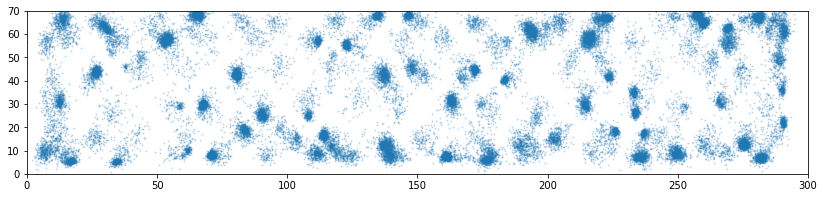

In [21]:
plt.figure(figsize=(14, 3))
ax = plt.subplot(111)
H.PlotAll(invert=True, s=1, alpha=0.2, ax=ax)
#ax.set_xlim((270,300))
ax.set_xlim((0,300))
ax.set_ylim((0,70))

# Use of the `HSClustering` class

In [30]:
from herdingspikes.hs2 import HSClustering

In [10]:
# read
C = HSClustering(H)

In [11]:
%%time
C.ShapePCA(pca_ncomponents=2, pca_whiten=True)

Fitting PCA using 47111 spikes...
...projecting...
...done
CPU times: user 470 ms, sys: 467 ms, total: 937 ms
Wall time: 335 ms


In [12]:
%%time
# note parameters are not particularly optimised (yet)
C.CombinedClustering(alpha=4, bandwidth=5., bin_seeding=False, n_jobs=-1)

Clustering...
Clustering 47111 spikes...
number of seeds: 47111
seeds/job: 11778
using 4 cpus


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(14, 4))
ax = plt.subplot(111)
C.PlotAll(invert=True, s=1, ax=ax, max_show=100000,show_labels=False)
plt.title("MeanShift, no bin seeding");

In [ ]:
units = range(16)
C.PlotShapes(units)

In [ ]:
C.PlotNeighbourhood(1,radius=6, alpha=0.8);

In [ ]:
C.SaveHDF5(file_name+"_sorted.hdf5")